In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))


cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/12
469/469 - 15s - loss: 0.6594 - accuracy: 0.7569 - val_loss: 0.4625 - val_accuracy: 0.8316 - 15s/epoch - 33ms/step
Epoch 2/12
469/469 - 15s - loss: 0.3969 - accuracy: 0.8560 - val_loss: 0.3740 - val_accuracy: 0.8630 - 15s/epoch - 31ms/step
Epoch 3/12
469/469 - 15s - loss: 0.3371 - accuracy: 0.8788 - val_loss: 0.3534 - val_accuracy: 0.8722 - 15s/epoch - 32ms/step
Epoch 4/12
469/469 - 15s - loss: 0.3013 - accuracy: 0.8893 - val_loss: 0.3343 - val_accuracy: 0.8786 - 15s/epoch - 32ms/step
Epoch 5/12
469/469 - 15s - loss: 0.2766 - accuracy: 0.8988 - val_loss: 0.3216 - val_accuracy: 0.8835 - 15s/epoch - 31ms/step
Epoch 6/12
469/469 - 15s - loss: 0.2578 - accuracy: 0.9052 - val_loss: 0.3268 - val_accuracy: 0.8855 - 15s/epoch - 31ms/step
Epoch 7/12
469/469 - 15s - loss: 0.2407 - accuracy: 0.9099 - val_loss: 0.2894 - val_accuracy: 0.8968 - 15s/epoch - 31ms/step
Epoch 8/12
469/469 - 15s - loss: 0.2254 - accuracy: 0.9159 - val_loss: 0.2863 - val_accuracy: 0.8945 - 15s/epoch - 31ms/step


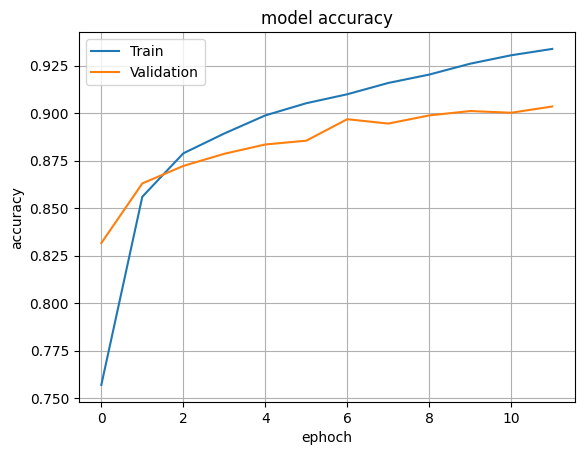

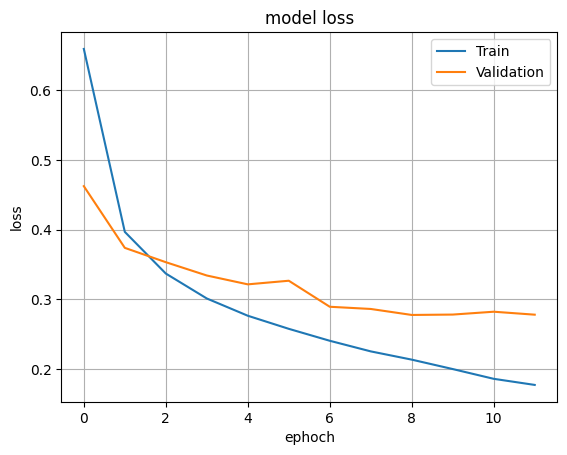

In [2]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('ephoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('ephoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()